In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
# def bs_3c(pred, frac, o, hist):
#     '''
#     bs three components decompose
#     '''
#     f = np.nansum(((pred - frac)**2)*hist)/np.sum(hist)
#     r = np.nansum(((frac - o)**2)*hist)/np.sum(hist)
#     return f, r

In [6]:
# with h5py.File(save_dir+'Accum_Calib_lead53_loc0.hdf', 'r') as h5io:
#     BASE_frac_loc0 = h5io['prob_true_base'][...]
#     BCNN_frac_loc0 = h5io['prob_true_bcnn'][...]
#     SL_frac_loc0 = h5io['prob_true_sl'][...]
#     SCNN_frac_loc0 = h5io['prob_true_scnn'][...]
    
#     BASE_pred_loc0 = h5io['prob_pred_base'][...]
#     BCNN_pred_loc0 = h5io['prob_pred_bcnn'][...]
#     SL_pred_loc0 = h5io['prob_pred_sl'][...]
#     SCNN_pred_loc0 = h5io['prob_pred_scnn'][...]
    
#     BASE_brier_loc0 = h5io['brier_base'][...]
#     BCNN_brier_loc0 = h5io['brier_bcnn'][...]
#     SL_brier_loc0 = h5io['brier_sl'][...]
#     SCNN_brier_loc0 = h5io['brier_scnn'][...]
    
#     BASE_use_loc0 = h5io['use_base'][...]
#     BCNN_use_loc0 = h5io['use_bcnn'][...]
#     SL_use_loc0 = h5io['use_sl'][...]
#     SCNN_use_loc0 = h5io['use_scnn'][...]
#     o_bar_loc0 = h5io['o_bar'][...]
    
# with h5py.File(save_dir+'Accum_Calib_lead53_loc1.hdf', 'r') as h5io:
#     BASE_frac_loc1 = h5io['prob_true_base'][...]
#     BCNN_frac_loc1 = h5io['prob_true_bcnn'][...]
#     SL_frac_loc1 = h5io['prob_true_sl'][...]
#     SCNN_frac_loc1 = h5io['prob_true_scnn'][...]
    
#     BASE_pred_loc1 = h5io['prob_pred_base'][...]
#     BCNN_pred_loc1 = h5io['prob_pred_bcnn'][...]
#     SL_pred_loc1 = h5io['prob_pred_sl'][...]
#     SCNN_pred_loc1 = h5io['prob_pred_scnn'][...]
    
#     BASE_brier_loc1 = h5io['brier_base'][...]
#     BCNN_brier_loc1 = h5io['brier_bcnn'][...]
#     SL_brier_loc1 = h5io['brier_sl'][...]
#     SCNN_brier_loc1 = h5io['brier_scnn'][...]
    
#     BASE_use_loc1 = h5io['use_base'][...]
#     BCNN_use_loc1 = h5io['use_bcnn'][...]
#     SL_use_loc1 = h5io['use_sl'][...]
#     SCNN_use_loc1 = h5io['use_scnn'][...]
#     o_bar_loc1 = h5io['o_bar'][...]
    
# with h5py.File(save_dir+'Accum_Calib_lead53_loc2.hdf', 'r') as h5io:
#     BASE_frac_loc2 = h5io['prob_true_base'][...]
#     BCNN_frac_loc2 = h5io['prob_true_bcnn'][...]
#     SL_frac_loc2 = h5io['prob_true_sl'][...]
#     SCNN_frac_loc2 = h5io['prob_true_scnn'][...]
    
#     BASE_pred_loc2 = h5io['prob_pred_base'][...]
#     BCNN_pred_loc2 = h5io['prob_pred_bcnn'][...]
#     SL_pred_loc2 = h5io['prob_pred_sl'][...]
#     SCNN_pred_loc2 = h5io['prob_pred_scnn'][...]
    
#     BASE_brier_loc2 = h5io['brier_base'][...]
#     BCNN_brier_loc2 = h5io['brier_bcnn'][...]
#     SL_brier_loc2 = h5io['brier_sl'][...]
#     SCNN_brier_loc2 = h5io['brier_scnn'][...]
    
#     BASE_use_loc2 = h5io['use_base'][...]
#     BCNN_use_loc2 = h5io['use_bcnn'][...]
#     SL_use_loc2 = h5io['use_sl'][...]
#     SCNN_use_loc2 = h5io['use_scnn'][...]
#     o_bar_loc2 = h5io['o_bar'][...]

In [7]:
# PLOT_loc0 = {}
# PLOT_loc0['base_fm'] = np.mean(BASE_frac_loc0, axis=1)
# PLOT_loc0['base_pm'] = np.mean(BASE_pred_loc0, axis=1)
# PLOT_loc0['base_fs'] = np.quantile(np.abs(BASE_frac_loc0-PLOT_loc0['base_fm'][..., None]), 0.95, axis=1)

# PLOT_loc0['bcnn_fm'] = np.mean(BCNN_frac_loc0, axis=1)
# PLOT_loc0['bcnn_pm'] = np.mean(BCNN_pred_loc0, axis=1)
# PLOT_loc0['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc0-PLOT_loc0['bcnn_fm'][..., None]), 0.95, axis=1)

# PLOT_loc0['sl_fm'] = np.mean(SL_frac_loc0, axis=1)
# PLOT_loc0['sl_pm'] = np.mean(SL_pred_loc0, axis=1)
# PLOT_loc0['sl_fs'] = np.quantile(np.abs(SL_frac_loc0-PLOT_loc0['sl_fm'][..., None]), 0.95, axis=1)

# PLOT_loc0['scnn_fm'] = np.mean(SCNN_frac_loc0, axis=1)
# PLOT_loc0['scnn_pm'] = np.mean(SCNN_pred_loc0, axis=1)
# PLOT_loc0['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc0-PLOT_loc0['scnn_fm'][..., None]), 0.95, axis=1)

# PLOT_loc1 = {}
# PLOT_loc1['base_fm'] = np.mean(BASE_frac_loc1, axis=1)
# PLOT_loc1['base_pm'] = np.mean(BASE_pred_loc1, axis=1)
# PLOT_loc1['base_fs'] = np.quantile(np.abs(BASE_frac_loc1-PLOT_loc1['base_fm'][..., None]), 0.95, axis=1)

# PLOT_loc1['bcnn_fm'] = np.mean(BCNN_frac_loc1, axis=1)
# PLOT_loc1['bcnn_pm'] = np.mean(BCNN_pred_loc1, axis=1)
# PLOT_loc1['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc1-PLOT_loc1['bcnn_fm'][..., None]), 0.95, axis=1)

# PLOT_loc1['sl_fm'] = np.mean(SL_frac_loc1, axis=1)
# PLOT_loc1['sl_pm'] = np.mean(SL_pred_loc1, axis=1)
# PLOT_loc1['sl_fs'] = np.quantile(np.abs(SL_frac_loc1-PLOT_loc1['sl_fm'][..., None]), 0.95, axis=1)

# PLOT_loc1['scnn_fm'] = np.mean(SCNN_frac_loc1, axis=1)
# PLOT_loc1['scnn_pm'] = np.mean(SCNN_pred_loc1, axis=1)
# PLOT_loc1['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc1-PLOT_loc1['scnn_fm'][..., None]), 0.95, axis=1)

# PLOT_loc2 = {}
# PLOT_loc2['base_fm'] = np.mean(BASE_frac_loc2, axis=1)
# PLOT_loc2['base_pm'] = np.mean(BASE_pred_loc2, axis=1)
# PLOT_loc2['base_fs'] = np.quantile(np.abs(BASE_frac_loc2-PLOT_loc2['base_fm'][..., None]), 0.95, axis=1)

# PLOT_loc2['bcnn_fm'] = np.mean(BCNN_frac_loc2, axis=1)
# PLOT_loc2['bcnn_pm'] = np.mean(BCNN_pred_loc2, axis=1)
# PLOT_loc2['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc2-PLOT_loc2['bcnn_fm'][..., None]), 0.95, axis=1)

# PLOT_loc2['sl_fm'] = np.mean(SL_frac_loc2, axis=1)
# PLOT_loc2['sl_pm'] = np.mean(SL_pred_loc2, axis=1)
# PLOT_loc2['sl_fs'] = np.quantile(np.abs(SL_frac_loc2-PLOT_loc2['sl_fm'][..., None]), 0.95, axis=1)

# PLOT_loc2['scnn_fm'] = np.mean(SCNN_frac_loc2, axis=1)
# PLOT_loc2['scnn_pm'] = np.mean(SCNN_pred_loc2, axis=1)
# PLOT_loc2['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc2-PLOT_loc2['scnn_fm'][..., None]), 0.95, axis=1)

In [8]:
# BS_loc0 = {}
# BS_loc0['base'] = np.mean(BASE_brier_loc0, axis=0)
# BS_loc0['bcnn'] = np.mean(BCNN_brier_loc0, axis=0)
# BS_loc0['sl'] = np.mean(SL_brier_loc0, axis=0)
# BS_loc0['scnn'] = np.mean(SCNN_brier_loc0, axis=0)

# BS_loc1 = {}
# BS_loc1['base'] = np.mean(BASE_brier_loc1, axis=0)
# BS_loc1['bcnn'] = np.mean(BCNN_brier_loc1, axis=0)
# BS_loc1['sl'] = np.mean(SL_brier_loc1, axis=0)
# BS_loc1['scnn'] = np.mean(SCNN_brier_loc1, axis=0)

# BS_loc2 = {}
# BS_loc2['base'] = np.mean(BASE_brier_loc2, axis=0)
# BS_loc2['bcnn'] = np.mean(BCNN_brier_loc2, axis=0)
# BS_loc2['sl'] = np.mean(SL_brier_loc2, axis=0)
# BS_loc2['scnn'] = np.mean(SCNN_brier_loc2, axis=0)

# USE_loc0 = {}
# USE_loc0['base'] = BASE_use_loc0/np.sum(BASE_use_loc0)
# USE_loc0['bcnn'] = BCNN_use_loc0/np.sum(BCNN_use_loc0)
# USE_loc0['sl'] = SL_use_loc0/np.sum(SL_use_loc0)
# USE_loc0['scnn'] = SCNN_use_loc0/np.sum(SCNN_use_loc0)

# USE_loc1 = {}
# USE_loc1['base'] = BASE_use_loc1/np.sum(BASE_use_loc1)
# USE_loc1['bcnn'] = BCNN_use_loc1/np.sum(BCNN_use_loc1)
# USE_loc1['sl'] = SL_use_loc1/np.sum(SL_use_loc1)
# USE_loc1['scnn'] = SCNN_use_loc1/np.sum(SCNN_use_loc1)

# USE_loc2 = {}
# USE_loc2['base'] = BASE_use_loc2/np.sum(BASE_use_loc2)
# USE_loc2['bcnn'] = BCNN_use_loc2/np.sum(BCNN_use_loc2)
# USE_loc2['sl'] = SL_use_loc2/np.sum(SL_use_loc2)
# USE_loc2['scnn'] = SCNN_use_loc2/np.sum(SCNN_use_loc2)

# o_bar = {}
# o_bar['loc0'] = o_bar_loc0
# o_bar['loc1'] = o_bar_loc1
# o_bar['loc2'] = o_bar_loc2

# REL_loc0 = {}
# RES_loc0 = {}
# BS_3c_loc0 = {}

# rel_, res_ = bs_3c(PLOT_loc0['base_pm'], PLOT_loc0['base_fm'], o_bar['loc0'], USE_loc0['base'])
# REL_loc0['base'] = rel_
# RES_loc0['base'] = res_
# BS_3c_loc0['base'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['bcnn_pm'], PLOT_loc0['bcnn_fm'], o_bar['loc0'], USE_loc0['bcnn'])
# REL_loc0['bcnn'] = rel_
# RES_loc0['bcnn'] = res_
# BS_3c_loc0['bcnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['sl_pm'], PLOT_loc0['sl_fm'], o_bar['loc0'], USE_loc0['sl'])
# REL_loc0['sl'] = rel_
# RES_loc0['sl'] = res_
# BS_3c_loc0['sl'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['scnn_pm'], PLOT_loc0['scnn_fm'], o_bar['loc0'], USE_loc0['scnn'])
# REL_loc0['scnn'] = rel_
# RES_loc0['scnn'] = res_
# BS_3c_loc0['scnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# REL_loc1 = {}
# RES_loc1 = {}
# BS_3c_loc1 = {}

# rel_, res_ = bs_3c(PLOT_loc1['base_pm'], PLOT_loc1['base_fm'], o_bar['loc1'], USE_loc1['base'])
# REL_loc1['base'] = rel_
# RES_loc1['base'] = res_
# BS_3c_loc1['base'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['bcnn_pm'], PLOT_loc1['bcnn_fm'], o_bar['loc1'], USE_loc1['bcnn'])
# REL_loc1['bcnn'] = rel_
# RES_loc1['bcnn'] = res_
# BS_3c_loc1['bcnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['sl_pm'], PLOT_loc1['sl_fm'], o_bar['loc1'], USE_loc1['sl'])
# REL_loc1['sl'] = rel_
# RES_loc1['sl'] = res_
# BS_3c_loc1['sl'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['scnn_pm'], PLOT_loc1['scnn_fm'], o_bar['loc1'], USE_loc1['scnn'])
# REL_loc1['scnn'] = rel_
# RES_loc1['scnn'] = res_
# BS_3c_loc1['scnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# REL_loc2 = {}
# RES_loc2 = {}
# BS_3c_loc2 = {}

# rel_, res_ = bs_3c(PLOT_loc2['base_pm'], PLOT_loc2['base_fm'], o_bar['loc2'], USE_loc2['base'])
# REL_loc2['base'] = rel_
# RES_loc2['base'] = res_
# BS_3c_loc2['base'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['bcnn_pm'], PLOT_loc2['bcnn_fm'], o_bar['loc2'], USE_loc2['bcnn'])
# REL_loc2['bcnn'] = rel_
# RES_loc2['bcnn'] = res_
# BS_3c_loc2['bcnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['sl_pm'], PLOT_loc2['sl_fm'], o_bar['loc2'], USE_loc2['sl'])
# REL_loc2['sl'] = rel_
# RES_loc2['sl'] = res_
# BS_3c_loc2['sl'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['scnn_pm'], PLOT_loc2['scnn_fm'], o_bar['loc2'], USE_loc2['scnn'])
# REL_loc2['scnn'] = rel_
# RES_loc2['scnn'] = res_
# BS_3c_loc2['scnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

In [9]:
# save_dict = {'PLOT':PLOT_loc0, 'BS':BS_loc0, 'USE':USE_loc0, 
#              'o_bar':o_bar['loc0'], 'REL':REL_loc0, 'RES':RES_loc0, 'BS_3c':BS_3c_loc0}
# np.save(save_dir+'Accum_Calib_BCH_d7_loc0.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc1, 'BS':BS_loc1, 'USE':USE_loc1, 
#              'o_bar':o_bar['loc1'], 'REL':REL_loc1, 'RES':RES_loc1, 'BS_3c':BS_3c_loc1}
# np.save(save_dir+'Accum_Calib_BCH_d7_loc1.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc2, 'BS':BS_loc2, 'USE':USE_loc2, 
#              'o_bar':o_bar['loc2'], 'REL':REL_loc2, 'RES':RES_loc2, 'BS_3c':BS_3c_loc2}
# np.save(save_dir+'Accum_Calib_BCH_d7_loc2.npy', save_dict)

In [10]:
gray = '0.75'
C = [red, orange, blue, cyan, gray]
LS = ['--', '-', '--', '-', '-']
M = ['v', 'o', '<', 's', '>', 'd', 'o']

KW = {}
KW['gefs'] = {'linestyle': '-', 'color': gray, 'linewidth':3.5, 'elinewidth':1.5}
KW['base'] = {'linestyle': '-', 'color': orange, 'linewidth':3.5, 'elinewidth':1.5}
KW['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':3.5, 'elinewidth':1.5}
KW['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':3.5, 'elinewidth':1.5}
KW['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':3.5, 'elinewidth':1.5}

kw_lines = {}
kw_lines['gfs'] = {'linestyle': '-', 'color': gray, 'linewidth':2.5}
kw_lines['era'] = {'linestyle': '--', 'color': 'k', 'linewidth':2.5}
kw_lines['base'] = {'linestyle': '-', 'color': orange, 'linewidth':2.5}
kw_lines['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':2.5}
kw_lines['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':2.5}
kw_lines['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':2.5}

In [11]:
def filter_single_point(use, plot):
    ''' '''
    locs = ['loc0', 'loc1', 'loc2']
    methods = ['bcnn', 'base', 'scnn', 'sl']
    
    for i, key in enumerate(locs):
        for j, m in enumerate(methods):
            flag_single_point = use[key][m] < 5e-4
            if np.sum(flag_single_point) > 0:
                use[key][m][flag_single_point] = np.nan
                plot[key]['{}_fm'.format(m)][flag_single_point] = np.nan
                
    return use, plot

In [12]:
calib_dict_loc0 = np.load(save_dir+'Accum_Calib_BCH_d7_loc0.npy', allow_pickle=True)[()]
calib_dict_loc1 = np.load(save_dir+'Accum_Calib_BCH_d7_loc1.npy', allow_pickle=True)[()]
calib_dict_loc2 = np.load(save_dir+'Accum_Calib_BCH_d7_loc2.npy', allow_pickle=True)[()]

PLOT = {}; BS = {}; USE = {}; o_bar = {}; REL = {}; RES = {}; BS_3c = {}

PLOT['loc0'] = calib_dict_loc0['PLOT']
PLOT['loc1'] = calib_dict_loc1['PLOT']
PLOT['loc2'] = calib_dict_loc2['PLOT']

BS['loc0'] = calib_dict_loc0['BS']
BS['loc1'] = calib_dict_loc1['BS']
BS['loc2'] = calib_dict_loc2['BS']

USE['loc0'] = calib_dict_loc0['USE']
USE['loc1'] = calib_dict_loc1['USE']
USE['loc2'] = calib_dict_loc2['USE']

o_bar['loc0'] = calib_dict_loc0['o_bar']
o_bar['loc1'] = calib_dict_loc1['o_bar']
o_bar['loc2'] = calib_dict_loc2['o_bar']

REL['loc0'] = calib_dict_loc0['REL']
REL['loc1'] = calib_dict_loc1['REL']
REL['loc2'] = calib_dict_loc2['REL']

RES['loc0'] = calib_dict_loc0['RES']
RES['loc1'] = calib_dict_loc1['RES']
RES['loc2'] = calib_dict_loc2['RES']

BS_3c['loc0'] = calib_dict_loc0['BS_3c']
BS_3c['loc1'] = calib_dict_loc1['BS_3c']
BS_3c['loc2'] = calib_dict_loc2['BS_3c']

USE, PLOT = filter_single_point(USE, PLOT)

print(o_bar)

{'loc0': array(0.07776607), 'loc1': array(0.11318829), 'loc2': array(0.11590563)}


In [13]:
#0.173*(12/(3.2)*2.05)/(12/(3.2)*2.65)

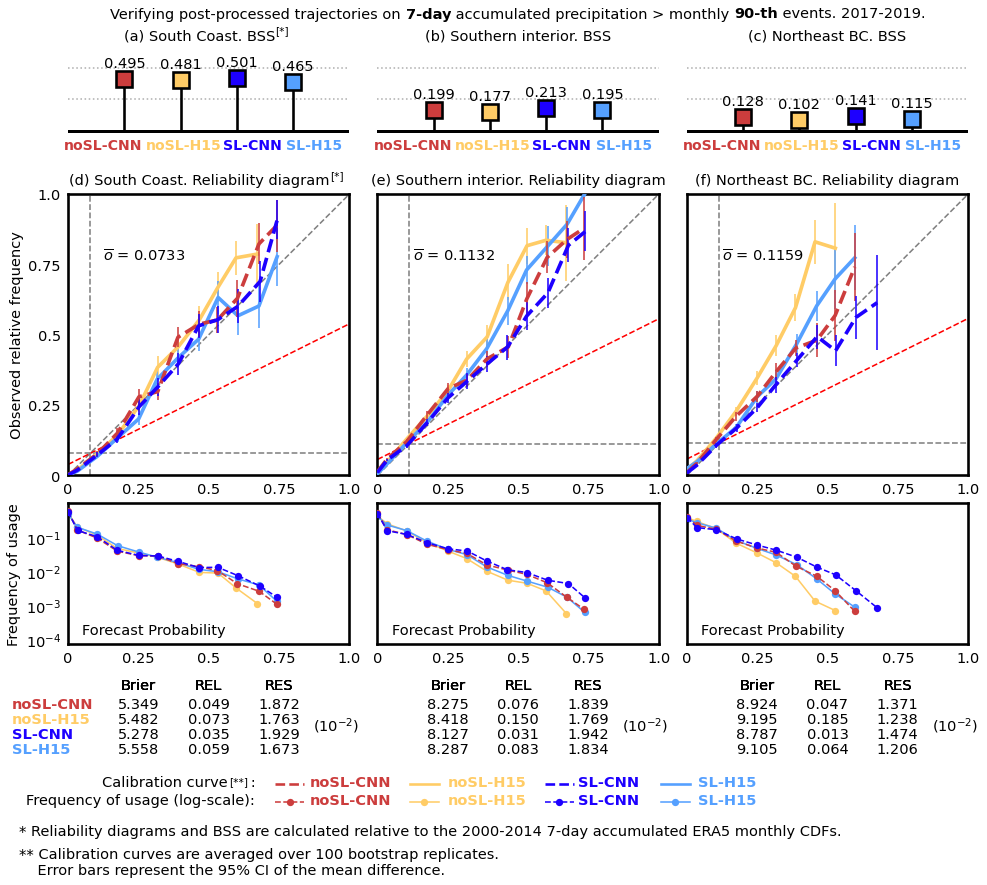

In [14]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.65), dpi=dpi_)

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(7, 5, height_ratios=[0.45, 0.15, 1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [7.5e-5, 1e0]
YLAB = [1e-4, 1e-3, 1e-2, 1e-1]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar['loc0'], 
          0.5*fake_x + 0.5*o_bar['loc1'], 
          0.5*fake_x + 0.5*o_bar['loc2']]

AX_bs = []
AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_bs.append(plt.subplot(gs[0, j]))
    AX_re.append(plt.subplot(gs[2, j]))
    AX_hi.append(plt.subplot(gs[4, j]))
    AX_da.append(plt.subplot(gs[6, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    
    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of usage', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['bcnn', 'base', 'scnn', 'sl']
Z = [5, 4, 5, 4, 4]
labels = ['noSL-CNN', 'noSL-H15', 'SL-CNN', 'SL-H15']
label_ = ['              ',
          '              ',
          '          ',
          '          ',]

bar_gap = 1/5
text_gap = 1/4

YLIM_bs = [-0.2, 1.0]
YTICKS_bs = np.array([0.0, 0.3, 0.6])

titles_bs = ['(a) South Coast. BSS    ', 
             '(b) Southern interior. BSS',
             '(c) Northeast BC. BSS']

titles_re = ['(d) South Coast. Reliability diagram    ', 
             '(e) Southern interior. Reliability diagram', 
             '(f) Northeast BC. Reliability diagram']

for i, key in enumerate(['loc0', 'loc1', 'loc2']):
    
    ax_bs = AX_bs[i]
    ax_bs.text(0.5, 0.975, titles_bs[i], ha='center', va='top', fontsize=14, transform=ax_bs.transAxes)
    ax_bs = gu.ax_decorate(ax_bs, left_flag=False, bottom_flag=False)
    ax_bs.grid(linestyle=":", linewidth=1.5)
    ax_bs.xaxis.grid(False)    
    ax_bs.spines["left"].set_visible(False)
    ax_bs.set_xlim([0, 1])
    ax_bs.set_ylim(YLIM_bs)
    ax_bs.set_yticks(YTICKS_bs)
    
    d_bs = 0.125*(YLIM_bs[1] - YLIM_bs[0])

    for m, method in enumerate(methods):
            
        x_ = np.array([bar_gap+bar_gap*m,])
        x_text = 0.5*text_gap + text_gap*m
        if m == 1:
            x_text += 0.035
        elif m == 2:
            x_text += 0.03
            
        bs_ = 1-10*np.array([BS[key]['{}'.format(method)],])
        
        marker_p, stem_p, base_p = ax_bs.stem(x_, bs_, bottom=0.0, use_line_collection=True)
        plt.setp(marker_p, marker='s', ms=15, mew=2.5, mec='k', mfc=KW[method]['color'], zorder=4)
        plt.setp(stem_p, linewidth=2.5, color='k')
        
        ax_bs.text(x_, bs_+d_bs, '{:.3f}'.format(bs_[0]), va='center', ha='center', fontsize=14)
        
        
        ax_bs.axhline(y=0.0, xmin=0, xmax=1, linewidth=2.5, color='k')
        ax_bs.text(x_text, -0.2, labels[m], ha='center', va='bottom', color=C[m], 
                  fontsize=13.5, fontweight='bold')
        
for i, key in enumerate(['loc0', 'loc1', 'loc2']):
    
    AX_re[i].text(0.5, 1.025, titles_re[i], fontsize=14, ha='center', va='bottom', transform=AX_re[i].transAxes)

    AX_re[i].axvline(x=o_bar[key], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[key], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT[key]['{}_pm'.format(method)][:]
        temp_f = PLOT[key]['{}_fm'.format(method)][:]
        temp_95th = PLOT[key]['{}_fs'.format(method)][:]
        
        temp_ux = temp_p
        temp_uy = USE[key]['{}'.format(method)][:]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        
AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.0733', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.1132', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.1159', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.9)/3.2, 1.0, (2.9/3.2), 0.025])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Verifying post-processed trajectories on ', '7-day', 
                                          ' accumulated precipitation > monthly ', '90-th', ' events. 2017-2019.'], 
                                         ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal'])


AX_bs[0].text(0.785, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=AX_bs[0].transAxes);
AX_re[0].text(0.98, 1.085, '[*]', ha='right', va='top', fontsize=10, transform=AX_re[0].transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.708, 0.53, 0.352, 0.173]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, key in enumerate(['loc0', 'loc1', 'loc2']):
    
    AX_da[i].text(1.035, 0.5+0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS_3c[key]['{}'.format(method)]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL[key]['{}'.format(method)]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES[key]['{}'.format(method)]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        
for m, method in enumerate(methods):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)
    
handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['bcnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['base']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[3], **kw_lines['sl']))
    
ax_box = fig.add_axes([-0.055, -0.0658+0.0134, 0.825, 0.0485])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='32.5%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='32.5%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='67.5%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='67.5%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, 
                   bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:4], 
                    bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.1, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.635, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.875, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)

ax_lg2.text(0.1, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.635, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.875, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_w1 = fig.add_axes([-0.055, -0.104+0.0134, 1.065, 0.0193])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BSS are calculated relative to the 2000-2014 7-day accumulated ERA5 monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.155+0.0134, 1.065, 0.0388])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI of the mean difference.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_BCH_Calib_accum_d7.png', format='png', **fig_keys)